In [1]:
from scipy.io import loadmat
import numpy as np
import math
import matplotlib.pyplot as plt 

X = loadmat("BreastCancer.mat")['X']
y = loadmat("BreastCancer.mat")['y']

In [2]:
def ista_solve_hot( A, d, la_array ):
    # ista_solve_hot: Iterative soft-thresholding for multiple values of
    # lambda with hot start for each case - the converged value for the previous
    # value of lambda is used as an initial condition for the current lambda.
    # this function solves the minimization problem
    # Minimize |Ax-d|_2^2 + lambda*|x|_1 (Lasso regression)
    # using iterative soft-thresholding.
    max_iter = 10**4
    tol = 10**(-3)
    tau = 1/np.linalg.norm(A,2)**2
    n = A.shape[1]
    w = np.zeros((n,1))
    num_lam = len(la_array)
    X = np.zeros((n, num_lam))
    for i, each_lambda in enumerate(la_array):
        for j in range(max_iter):
            z = w - tau*(A.T@(A@w-d))
            w_old = w
            w = np.sign(z) * np.clip(np.abs(z)-tau*each_lambda/2, 0, np.inf)
            X[:, i:i+1] = w
            if np.linalg.norm(w - w_old) < tol:
                break
    return X

In [3]:
lambda_list = np.logspace(-6, math.log10(20))

X_100 = X[0:100, :]
y_100 = y[0:100]

w_array = ista_solve_hot(X_100, y_100, lambda_list)

In [4]:
#residual = [np.linalg.norm(
    #(np.sign(X_100@w_array[:,i]) - y_100),ord=2) for i in range(50)]
residual = [np.linalg.norm(
    ((X_100@w_array[:,i]).reshape(100,1) - y_100), ord=2) for i in range(50)]
weights = [np.linalg.norm(w_array[:,i], ord=1) for i in range(50)]

print(residual)
print(weights)

[0.5517470751599132, 0.5436396454039996, 0.5356667729573878, 0.5278257516827031, 0.5201139511605946, 0.5125288146944126, 0.5050678597685573, 0.49772867794557, 0.49050893837768705, 0.48340638721059154, 0.47641885514747356, 0.46954426749651373, 0.4627806559283616, 0.45612618176779773, 0.449579165897921, 0.44313811193061786, 0.436801796654241, 0.4305693152374521, 0.42444020968506, 0.4184146688677563, 0.41249370253189394, 0.40667954292483194, 0.40097605547977516, 0.395389527992944, 0.389929445364101, 0.3846097510404124, 0.37945123721508744, 0.37448440104985503, 0.36975358472888376, 0.36532396442885284, 0.3612919938253821, 0.35779940189228704, 0.3550649700420695, 0.3534234644433344, 0.3533996844893327, 0.42120689360988117, 0.5981950512755683, 0.7757082124157335, 0.9830293494537766, 1.2227977115543236, 1.516976267373847, 1.881501771190612, 2.3353488190329807, 2.8850676206525403, 3.5308106715335827, 4.277940183932605, 5.159924452175169, 6.02026650620232, 7.016664593898313, 7.862907150552987]


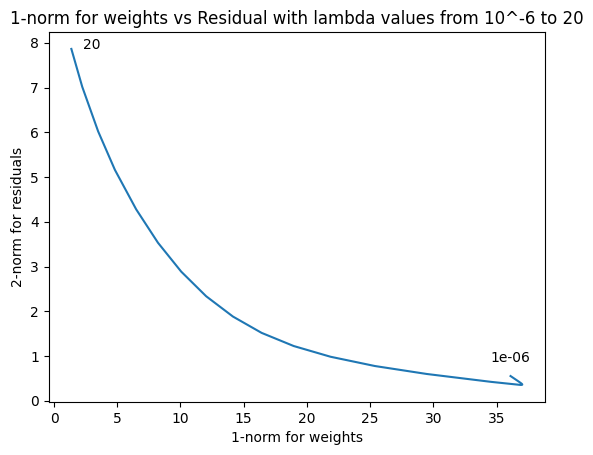

In [12]:
plt.plot(weights, residual)
plt.title("1-norm for weights vs Residual with lambda values from 10^-6 to 20")
plt.xlabel("1-norm for weights")
plt.ylabel("2-norm for residuals")

plt.annotate("1e-06", # text
             (weights[0],residual[0]), # coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(0,10), # distance from text to points (x,y)
             ha='center') # horizontal alignment can be left, right or center
plt.annotate("20", # text
             (weights[49],residual[49]), # coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(15,0), # distance from text to points (x,y)
             ha='center') # horizontal alignment can be left, right or center

plt.show()

In [16]:
def error_rate(X, y, weights):
  err = 0
  y_hat = np.sign(X@weights)
  for i in range(len(y)):
    if (y[i] != y_hat[i]):
      err+=1
  return err/len(y_hat)

error = [error_rate(X_100, y_100, w_array[:,i]) for i in range(50)]
sparsity = [(abs(w_array[:,i]) > 10**-6).sum() for i in range(50)]

print(error)
print(sparsity)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.05, 0.12, 0.19]
[8137, 8140, 8140, 8139, 8139, 8140, 8141, 8139, 8139, 8139, 8139, 8140, 8140, 8141, 8140, 8141, 8141, 8140, 8141, 8139, 8140, 8139, 8138, 8140, 8140, 8140, 8138, 8140, 8138, 8138, 8135, 8128, 8112, 8096, 8081, 7438, 5537, 3983, 2796, 1961, 1349, 925, 622, 420, 274, 179, 112, 66, 39, 21]


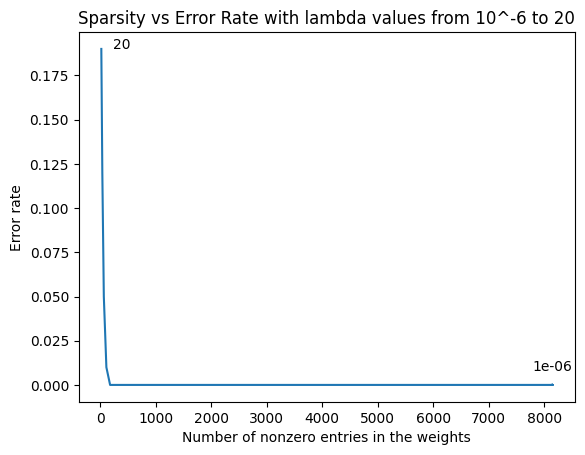

In [17]:
plt.plot(sparsity, error)
plt.title("Sparsity vs Error Rate with lambda values from 10^-6 to 20")
plt.xlabel("Number of nonzero entries in the weights")
plt.ylabel("Error rate")

plt.annotate(lambda_list[0], # text
             (sparsity[0],error[0]), # coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(0,10), # distance from text to points (x,y)
             ha='center') # horizontal alignment can be left, right or center
plt.annotate("20", # text
             (sparsity[49],error[49]), # coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(15,0), # distance from text to points (x,y)
             ha='center') # horizontal alignment can be left, right or center

plt.show()

## Part c)

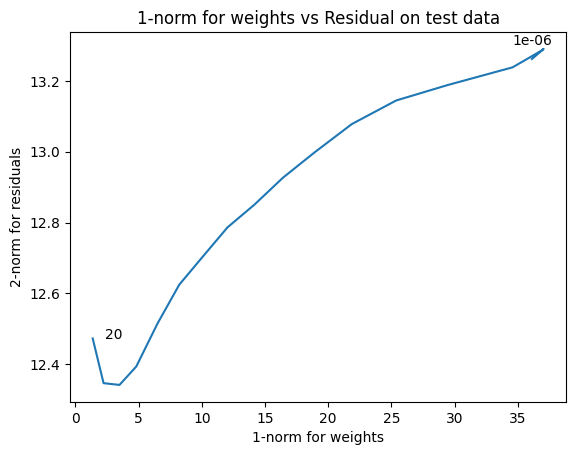

In [18]:
X_test = X[100:, :]
y_test = y[100:]

residual_test = [np.linalg.norm(
    ((X_test@w_array[:,i]).reshape(195,1) - y_test),ord=2) for i in range(50)]

plt.plot(weights, residual_test)
plt.title("1-norm for weights vs Residual on test data")
plt.xlabel("1-norm for weights")
plt.ylabel("2-norm for residuals")
plt.annotate("1e-06", # text
             (weights[0],residual_test[0]), # coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(0,10), # distance from text to points (x,y)
             ha='center') # horizontal alignment can be left, right or center
plt.annotate("20", # text
             (weights[49],residual_test[49]), # coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(15,0), # distance from text to points (x,y)
             ha='center') # horizontal alignment can be left, right or center
plt.show()

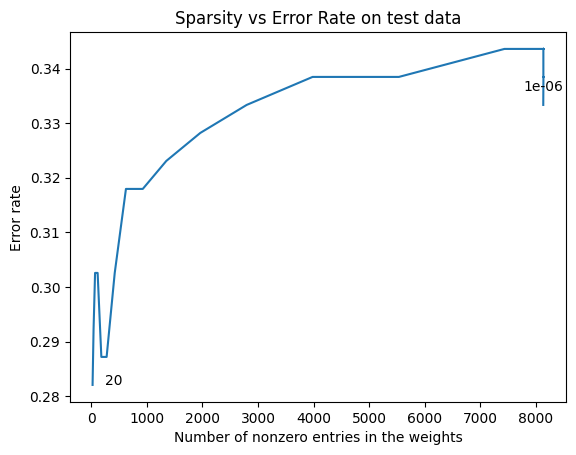

In [19]:
error_test = [error_rate(X_test, y_test, w_array[:,i]) for i in range(50)]

plt.plot(sparsity, error_test)
plt.title("Sparsity vs Error Rate on test data")
plt.xlabel("Number of nonzero entries in the weights")
plt.ylabel("Error rate")

plt.annotate(lambda_list[0], # text
             (sparsity[0],error_test[0]), # coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(0,10), # distance from text to points (x,y)
             ha='center') # horizontal alignment can be left, right or center
plt.annotate("20", # text
             (sparsity[49],error_test[49]), # coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(15,0), # distance from text to points (x,y)
             ha='center') # horizontal alignment can be left, right or center

plt.show()